# TP 1 de $\textit{Physique numérique}$ par Gabriel Hémond et Meriem Khalfoun
# Pouvoir d’arrêt collisionnel des protons
## 1.
Typiquement, les protons utilisés en protonthérapie ont entre 70 et 250 MeV d'énergie cinétique, mais l'énergie maximale utilisée la plus commune dans les centres de photonthérapie est de 230 MeV.

L'énergie totale d'un corps s'écrit $E=\gamma mc^2$ alors que l'énergie de repos s'écrit $E_0=mc^2$, donc l'énergie cinétique est $T=E-E_0=(\gamma-1)mc^2$. En inversant cette équation, on obtient $$\boxed{\gamma=\frac{T}{mc^2}+1}$$ Par leur définition, $\beta=\frac{v}{c}$ et $\gamma=\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Par substitution, on voit que $$\boxed{\gamma=\frac{1}{\sqrt{1-\beta^2}}}\quad\text{et}\quad\boxed{\beta=\sqrt{1-\frac{1}{\gamma^2}}}$$

## 2.
La densité électronique ($n_e$) est le nombre d'électrons par unité de volume, ce qui correspond à la somme des densités atomiques des différents éléments du matériau multipliées par leur nombre de proton ($Z$) par atome correspondant (en présumant que le matériau est électriquement neutre). La densité atomique d'un élément correspond à la densité massique du matériau ($\rho$) en grammes par cm$^3$ multipliée par la fraction de la masse du matériau appartenant à l'élément ($\xi$) divisée par la masse atomique de l'élément ($m_Z$) en grammes par mole, le tout multiplié par le nombre d'Avogadro ($N_o$) pour que les grammes par moles deviennent des grammes par atome. Autrement dit, $$n_e=\rho N_A\sum_{Z=1}^\infty\frac{Z\xi_Z}{m_Z}$$
Le code suivant calcul les densités électroniques de l'eau et de l'os cortical. Les masses atomiques et les compositions atomiques ont été trouvées sur le site NIST

In [1]:
def densite_elec_massique(masses_materiau, masses_atomiques, rho, avogadro):
    """Évalue la densité électronique en électrons par cm^3"""
    densite = 0
    for i in masses_materiau:
        densite += i * masses_materiau[i] / masses_atomiques[i]
    
    densite = densite * avogadro * rho
    return densite


avogadro = 6.022 * 10 ** 23  # [atomes par mole]
masses_atomiques = {
    1: 1.0079,
    6: 12.0107,
    7: 14.0067,
    8: 15.9994,
    12: 24.305,
    15: 30.9738,
    16: 32.065,
    20: 40.078,
    30: 65.39,
}

masses_eau = {1: 0.111894, 8: 0.888106}
masses_os = {
    1: 0.047234,
    6: 0.144330,
    7: 0.041990,
    8: 0.446096,
    12: 0.002200,
    15: 0.104970,
    16: 0.003150,
    20: 0.209930,
    30: 0.000100
}
rho_os = 1.85  # Densités massiques [g/cm^3]
rho_eau = 1

d_e_eau =  densite_elec_massique(masses_eau, masses_atomiques, rho_eau, avogadro)
d_e_os = densite_elec_massique(masses_os, masses_atomiques, rho_os, avogadro)

print("Densité électronique de l'eau: {0} électrons par cm^3\n".format(d_e_eau))
print("Densité électronique de l'os cortical: {0} électrons par cm^3".format(d_e_os))

Densité électronique de l'eau: 3.342731617093692e+23 électrons par cm^3

Densité électronique de l'os cortical: 5.807706023151945e+23 électrons par cm^3


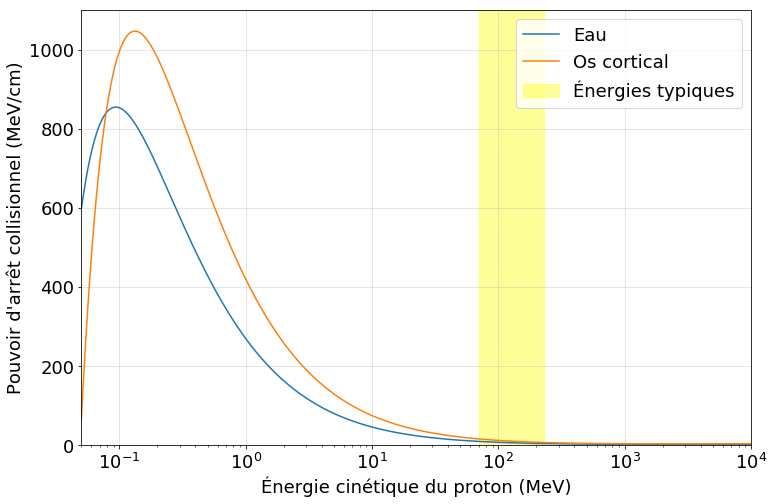

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def gamma(T):
    return T / mp + 1


def pouvoir_eau(T):
    '''Approximation du pouvoir d'arrêt de l'eau en fonction de l'énergie cinétique'''
    gamma = T / mp + 1
    return 2 * np.pi * re ** 2 * me * d_e_eau * (np.log(4 * me * (1 - 1 / gamma ** 2) * gamma ** 2 * me * (gamma ** 2 - 1) / \
            ((1 + 2 * gamma * me / mp + (me / mp) ** 2) * energie_eau ** 2)) / (1 - 1 / gamma ** 2) - 2)


def pouvoir_os(T):
    '''Approximation du pouvoir d'arrêt de l'os cortical en fonction de l'énergie cinétique'''
    gamma = T / mp + 1
    return 2 * np.pi * re ** 2 * me * d_e_os * (np.log(4 * me * (1 - 1 / gamma ** 2) * gamma ** 2 * me * (gamma ** 2 - 1) / \
            ((1 + 2 * gamma * me / mp + (me / mp) ** 2) * energie_os ** 2)) / (1 - 1 / gamma ** 2) - 2)


re = 2.82 * 10 ** -13  # Rayon classique de l'électron (cm)
me = 0.511  # Masse classique de l'électron multipliée par c^2 (MeV)
mp = 938  # Masse classique du proton multipliée par c^2 (MeV)
energie_eau = 75 * 10 ** -6  # Énergies d'excitation moyenne (MeV)
energie_os = 106.4 * 10 ** -6

Scol_eau = np.vectorize(pouvoir_eau)
Scol_os = np.vectorize(pouvoir_os)

axis = np.linspace(0.05, 1, 2000)
axis = np.append(axis, np.linspace(1.01, 30, 2000))
axis = np.append(axis, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis, Scol_eau(axis), axis, Scol_os(axis))
plt.fill_between(np.linspace(70, 230), 0, 1400, color='yellow', alpha=0.4)
plt.legend(('Eau', 'Os cortical', 'Énergies typiques'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt collisionnel (MeV/cm)", fontsize=18)
plt.xlim(0.05, 10 ** 4)
plt.ylim(0, 1100)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

# Portée des protons dans la matière
## 3.
La portée dans l'approximation CSDA ($R_{CSDA}$) est exprimée en grammes par centimètre carré. Or, on a que $\frac{R_{CSDA}}{\rho}=\int_0^{T_i}\frac{\text{d}T'}{S_{col}}$. $S_{col}$ est exprimé en MeV/cm et $\rho$ en g/cm$^3$, ce qui signifie que $\frac{\text{d}T'}{S_{col}}$ et $\frac{R_{CSDA}}{\rho}$ sont tous deux exprimés en centimètres. Ainsi, on peut dire que l'analyse dimensionnelle montre que l'équation est logique.

## 4.
Le graphique suivant superpose le pouvoir d'arrêt collisionnel calculé (en bleu) et le pouvoir d'arrêt total trouvé sur le site du NIST (en orange) entre 70 MeV et 250 MeV, c'est-à-dire dans la gamme d'énergie des protons typiquement utilisés en protonthérapie. 
On remarque que la courbe et les points se superposent parfaitement, ce qui justifie l'utilisation du pouvoir d'arrêt collisionnnel pour représenter le pouvoir d'arrêt total dans cette la gamme d'énergie communément.

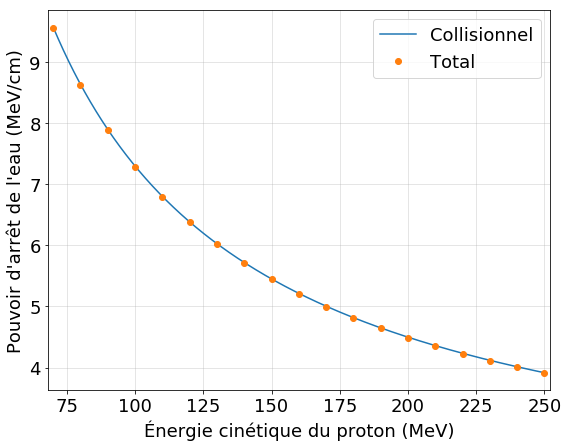

In [4]:
axis_ref = np.linspace(70, 250, 19)
ref = [9.559,8.625,7.888,7.289,6.794,6.377,6.021,5.713,5.445,5.209,4.999,4.812,4.644,4.492,4.354,4.229,4.114,4.008,3.911]
axis = np.linspace(70, 250, 4000)
plt.figure(figsize=(9, 7))
plt.plot(axis, Scol_eau(axis), axis_ref, ref, 'o')
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt de l'eau (MeV/cm)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(("Collisionnel", "Total"), fontsize=18)
plt.xlim(68, 252)
plt.grid('on', alpha=0.4)

# Détermination de $R_{CSDA}$ par intégration numérique
## 5.
Pour calculer le $R_{CSDA}$, il faut faire l'intégrale de l'inverse de $S_{col}$. Or $S_{col}$ dépend de $\gamma$ et $\beta$ qui eux-même dépendent de $T$. Dans $S_{col}$, il y a un logarithme naturelle d'une fonction de $T$, ce qui est extrèmement difficile, voir impossible, à intégrer analytiquement.
 
## 6.
L'intégrale valant $R_{CSDA}$ peut se calculer grâce à un algorithme adaptatif utilisant la méthode des trapèzes. 

L'intégration adaptative consiste à utiliser un petit nombre de trapèzes pour ensuite le doubler itérativement jusqu'à l'obtention de l'erreur désirée. L'erreur se calcule comme suit: $$\varepsilon_n = \frac{I_n- I_{n - 1}}{3}$$où $I_n=\frac{I_{n-1}}{2}+\frac{T_i}{2^n}\sum_{k=1}^{2^n-1}f\left(\frac{kT_i}{2^n}\right)$ est la valeur de l'intégrale selon le calcul effectué à la $i$ème itération.

Dans notre cas, on cherche à avoir une précision valant $10^{-9}$cm. Il est à noter que l'intégrale ne sera pas vraiment calculée entre $T_i$ et $0$ puisque l'approximation du pouvoir d'arrêt n'est pas bonne dans tout l'intervalle. Ainsi, lorsque les protons auront 1MeV, ils seront considérés comme stoppés, ceci diminue considérablement le temps de calcul et le essai erreur détermine que ça ne change pas beaucoup la réponse obtenue.

In [7]:
import time

def trapezoid_algo(Scol, Tproton, cible, start):
    """Applique la méthode des trapèzes de façon adaptative et calcule l'erreur jusqu'à l'obtention de l'erreur désirée"""
    temps = time.time()
    step = Tproton - start
    erreur = cible + 1
    n = 0
    prev = step * (1 / Scol(Tproton) + 1 / Scol(start))
    
    while erreur > cible:
        values = np.linspace(start + step / 2 ** (n + 1), Tproton - step / 2 ** (n + 1), 2 ** n)
        somme = step * np.sum(1 / Scol(values))
        current = prev / 2 + somme / 2 ** n
        erreur = abs(current - prev) / 3
        prev = current
        n += 1
    
    temps = time.time() - temps
    results = [current, erreur, n, temps]
    return results


cible = 10 ** -9  # Erreur cible [cm]
Tproton = 100  # Énergie cinétique du proton incident [MeV]
start = 1  # Point de départ de l'intégrale / énergie «d'arrêt» du proton [MeV]


RCSDA_eau = trapezoid_algo(Scol_eau, Tproton, cible, start)
RCSDA_os = trapezoid_algo(Scol_os, Tproton, cible, start)

print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'eau".format(Tproton, RCSDA_eau[0], RCSDA_eau[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes\n".format(RCSDA_eau[2], RCSDA_eau[3]))
print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'os cortical".format(Tproton, RCSDA_os[0], RCSDA_os[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes".format(RCSDA_os[2], RCSDA_os[3]))

La portée d'un proton à 100MeV est (15.3984921792 ± 6.01e-10)cm dans l'eau
Ce calcul a nécessité 16 itérations et 0.196170091629028 secondes

La portée d'un proton à 100MeV est (9.30997012876 ± 3.72e-10)cm dans l'os cortical
Ce calcul a nécessité 16 itérations et 0.203109264373779 secondes


## 7.
On sait que:
\begin{aligned}
\beta^2 &= 1 - \frac{1}{\gamma^2} = \frac{\gamma^2 - 1}{\gamma^2}\\
\gamma &= \frac{T}{m_pc^2} + 1 \\
\frac{\text{d}\gamma}{\text{d}T} &= \frac{1}{m_pc^2}
\end{aligned}

En posant les variables suivantes:
\begin{aligned}
&T_{e}^{\max }=\frac{a c^2 \left(\gamma^{2}-1\right)}{b+ 2\gamma d}\\
&\text { avec }: a=2 m_{e}, \quad b=1+\left(\frac{m_{e}}{m_{p}}\right)^{2} \quad \text { et } \quad d=\frac{m_{e}}{m_{p}}\\
&U=2 \pi r_{e}^{2} m_{e} c^{2} n_{e}\\
&k=\frac{a^{2}}{I^{2}}
\end{aligned}

On peut réécrire le pouvoir d’arrêt collisionnel en fonction de $\gamma$:
\begin{aligned}
S_{col}(\gamma) &= U\frac{\gamma^2}{\gamma^2 - 1} \left( \ln \left( \frac{k c^4 (\gamma^2 - 1)^2}{b + 2d\gamma} \right) -2\frac{(\gamma^2 - 1)}{\gamma^2} \right)
\end{aligned}

Grâce au théorème de dérivations des fonctions composées, on sait que $\frac{\text{d}S_{col}}{\text{d}T} = \frac{\text{d}S_{col}}{\text{d}\gamma} \frac{\text{d}\gamma}{\text{d}T}$

La dérivée en fonction de T du pouvoir d'arrêt collisionnel est donc:
$$\frac{\text{d}S_{col}}{\text{d}T} = \frac{1}{m_pc^2}\left(-\frac{2U\gamma}{(\gamma^2 - 1)^2} \ln \left(\frac{kc^4 (\gamma^2 - 1)^2}{b + 2d\gamma}\right) + \frac{2U\gamma^2(2b\gamma+3\gamma^2d+d)}{(\gamma^2 - 1)^2(b+2\gamma d)}\right)$$
De plus, la dérivée de l'inverse du pouvoir d'arrêt peut être trouvée grâce à la dérivation en chaîne:
$$\frac{\text{d}}{\text{d}T}\left(\frac{1}{S_{col}}\right)=-\frac{1}{(S_{col})^2}\frac{\text{d}S_{col}}{\text{d}T}$$

Le code suivant trace le graphique de la dérivée du pouvoir d'arrêt collisionnel et le graphique de l'inverse du pouvoir d'arrêt collisionnel en fonction de l'énergie cinétique du proton. L'énergie cinétique est en échelle logarithmique. Les
énergies moyennes d’excitation (I) ont été trouvées sur le site du NIST

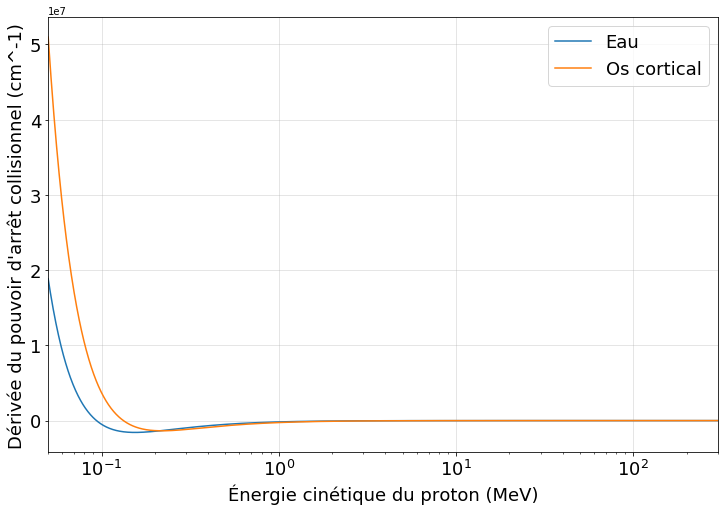

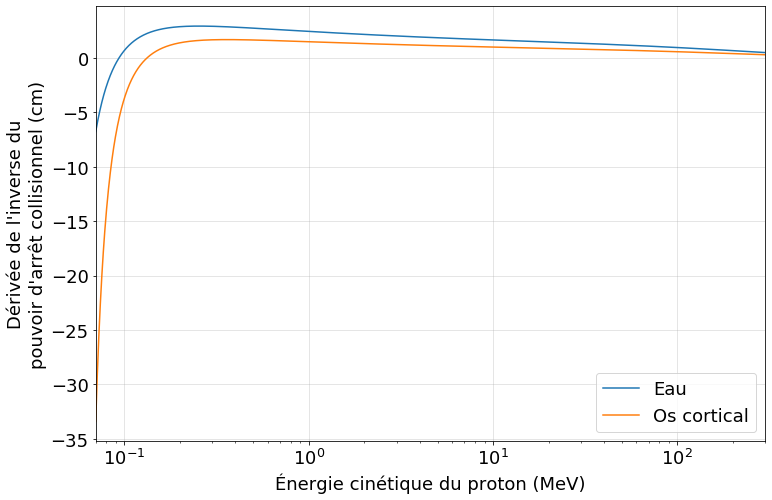

In [9]:
def Sprime(energie, dens, re, me, mp):
    Scolp = lambda T : 4 * np.pi * re ** 2 * me * dens * ((T / mp + 1) ** 2 * (2 * (T / mp + 1) + 2 * (T / mp + 1) * \
                        (me / mp) ** 2 + 3 * me * (T / mp + 1) ** 2 / mp + me / mp) / (1 + (me / mp) ** 2 + 2 * me * \
                            (T / mp + 1) ** 2 / mp) - (T / mp + 1) * np.log(2 * me * (1 - 1 / (T / mp + 1) ** 2) * \
                                (T / mp + 1) ** 2 * ((2 * me * ((T / mp + 1) ** 2 - 1)) / (1 + 2 * (T / mp + 1) * \
                                    me / mp + (me / mp) ** 2)) / energie ** 2)) / ((T / mp + 1) ** 2 - 1) ** 2
    return Scolp


Sprime_eau = np.vectorize(Sprime(energie_eau, d_e_eau, re, me, mp))
Sprime_os = np.vectorize(Sprime(energie_os, d_e_os, re, me, mp))
Sprime_inv_eau = lambda T : -1 * Sprime_eau(T) / (Scol_eau(T)) ** 2
Sprime_inv_os = lambda T : -1 * Sprime_os(T) / (Scol_os(T)) ** 2

axis1 = np.linspace(0.05, 1, 2000)
axis1 = np.append(axis1, np.linspace(1.01, 30, 2000))
axis1 = np.append(axis1, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis1, Sprime_eau(axis1) , axis1, Sprime_os(axis1))
plt.legend(('Eau', 'Os cortical'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel (cm^-1)", fontsize=18)
plt.xlim(0.05, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

axis2 = np.linspace(0.07, 1, 2000)
axis2 = np.append(axis2, np.linspace(1.01, 30, 2000))
axis2 = np.append(axis2, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis2, Sprime_inv_eau(axis2) , axis2, Sprime_inv_os(axis2))
plt.legend(('Eau', 'Os cortical'), loc='lower right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée de l'inverse du\npouvoir d'arrêt collisionnel (cm)", fontsize=18)
plt.xlim(0.07, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

Selon le premier graphique représentant la dérivée du pouvoir d'arrêt collisionnel, nous dit que le pouvoir d'arrêt collisionnel augmente avec l'énergie, jusqu'à une énergie un peu inférieur à $0.1 MeV$ pour l'eau et un peu supérieur à $0.1 MeV$ pour l'os cortical. Par après, la dérivée est négative et tend vers 0 pour les grandes énergies. On remarque que le résultat de la dérivée est en accord avec la courbe de $S_{col}$ en fonction de l'énergie au numéro 2. Il n'y a donc pas d'erreur dans la dérivée. 

## 8.
L'erreur pour la méthode des trapèzes obéit à l'équation suivante: $$\epsilon\simeq\frac{h^2|f'(a)-f'(b)|}{12\int_a^bf(x)\text{d}x}$$où $h$ est le pas, dont la valeur est $\frac{b-a}{2^n}$, où $n$ est le nombre d'itérations nécessaires.

In [10]:
diff_diff_eau = abs(Sprime_inv_eau(start) - Sprime_inv_eau(Tproton))
print("La différence de dérivées pour l'eau est de {}".format(diff_diff_eau))
approx_erreur_eau = diff_diff_eau * (start - Tproton) ** 2 / (12 * 2 ** (2 * RCSDA_eau[2]) * RCSDA_eau[0])
print("L'erreur selon cette équation est de {}cm".format(approx_erreur_eau))
diff_diff_os = abs(Sprime_inv_os(start) - Sprime_inv_os(Tproton))
print("La différence de dérivées pour l'os cortical est de {}".format(diff_diff_os))
approx_erreur_os = diff_diff_os * (start - Tproton) ** 2 / (12 * 2 ** (2 * RCSDA_os[2]) * RCSDA_os[0])
print("L'erreur selon cette équation est de {}cm".format(approx_erreur_os))

La différence de dérivées pour l'eau est de 1.4823375736132245
L'erreur selon cette équation est de 1.830619997146257e-08cm
La différence de dérivées pour l'os cortical est de 0.9175972803767801
L'erreur selon cette équation est de 1.874274135483943e-08cm


# Optimisation
## 9.
Le code suivant calcule la portée de $10000$ protons dont l'énergie est distribué selon une normale, grace à la quadrature gaussienne. 

Grâce au module time, on estime le temps requis pour le calcul. Cela permettra de comparer les différentes techniques d'intégration pour choisir la plus rapide. Le code affiche aussi un histogramme des portées obtenues pour ces 10 000
protons.

Durée: 8.015357971191406 secondes. Fréquence: 1247.6049149572289 protons par seconde


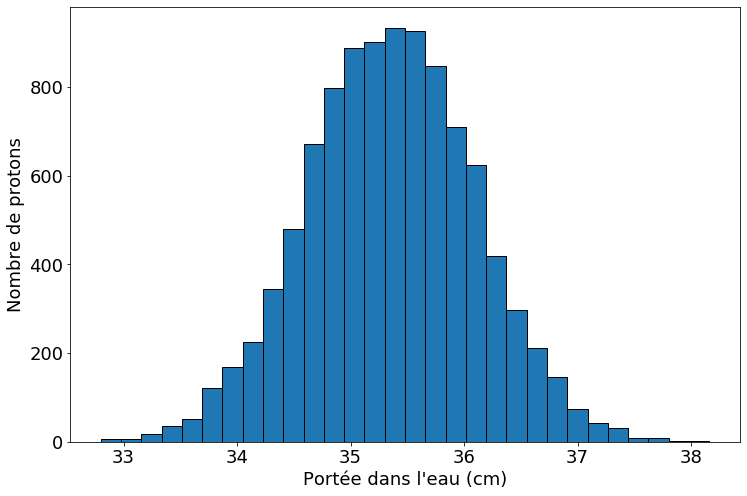

In [11]:
from scipy.special.orthogonal import p_roots

def gauss_algo(Scol, Ti, start, cible):
    N = -1
    erreur = cible + 1
    prev = 0
    while erreur > cible:
        N += 1
        [T, w] = p_roots(2 ** N)
        current = (Ti[0] - start) * np.sum(w * Scol(((Ti[0] - start) * T + (Ti[0] + start)) / 2)) / 2
        erreur = abs(current - prev)
        prev = current
    
    print("Les calculs utilisent {} points".format(2 ** N))
    w = np.array(w)
    Gauss = (np.sum(w / (Scol((np.outer((Ti - start), T) + (Ti + start)) / 2)), axis = 1) * (Ti - start).T / 2).T
    results = [Gauss, 2 ** N]
    return results

n_protons = 10000
énergies_tests = np.random.normal(240, 3, (n_protons, 1))

temps = time.time()
portées_eau_gauss = gauss_algo(Scol_eau, énergies_tests, start, cible)
temps = time.time() - temps
print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, n_protons / temps))

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_gauss[0], bins=30, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 10.
On réutilise maintenant la technique des trapèzes déjà implémentée plus haut, mais sans la partie adaptative. 

De la même manière qu'au numéro précédent, on mesure le temps requis pour calculer la portée de 10000 protons d'énergies différentes et on affiche un histogramme de la portée de ces protons. 

D'abord, déterminons le nombre de points pour avoir une erreur de $10^{-9}$. Avec l'approximation grossière $N\sim C^{-\frac{1}{2}}$ où $N$ est le nombre de points à considérer et $C$ est l'erreur désirée, on obtient que le nombre de points à utiliser est environ 31623. Afin de s'assurer que l'erreur sera toujours plus basse que $10^{-9}$cm, nous utiliserons plutôt 32000 points + les 2 points qui représentent les extrémités. Ce nombre de points est justifié puisque l'erreur calculée est en réalité une limite supérieure approximative; l'erreur réelle est plus petite que notre erreur estimée.

Durée: 1030.1269755363464 secondes. Fréquence: 9.70754114539462 protons par seconde


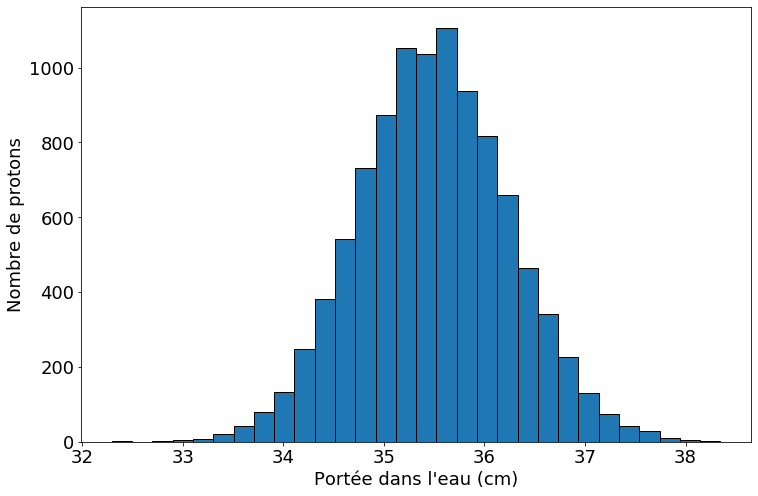

In [13]:
def trapezoid_pasdaptatif(Scol, énergies, start, N):
    temps = time.time()
    step = (énergies - start) / N
    values = np.linspace(step + start, énergies - step, N)
    estimates = step * np.sum(1 / Scol(values), axis = 0) + (1 / Scol(start) + 1 / Scol(énergies)) / 2
    temps = time.time() - temps
    print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, len(énergies) / temps))
    return estimates


énergies_tests = np.random.normal(240, 3, (n_protons, 1))
number_of_points = 32000
portées_eau_trap = trapezoid_pasdaptatif(Scol_eau, énergies_tests, start, number_of_points)

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_trap, bins=30, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 11.
On utilise maintenant la routine scipy.integrate.quad afin de calculer la portée de 10000 protons, d'en faire un histogramme et de mesurer encore le temps d'exécution.

La routine scipy.integrate.quad permet d’intégrer une fonction en utilisant une technique provenant de QUADPACK de la librairie de Fortran. Les techniques QUADPACK  utilisent la quadrature de Gauss-Kronrod qui est une variante de la quadrature gaussienne. Comme la quadrature gaussienne, cette méthode utilise un polynôme de degré $N$ pour approximer la fonction à intégrer et réutilise les approximations faites pour en calculer une meilleure approximation.

Durée: 33.86476397514343 secondes. Fréquence: 295.2921806081374 protons par seconde


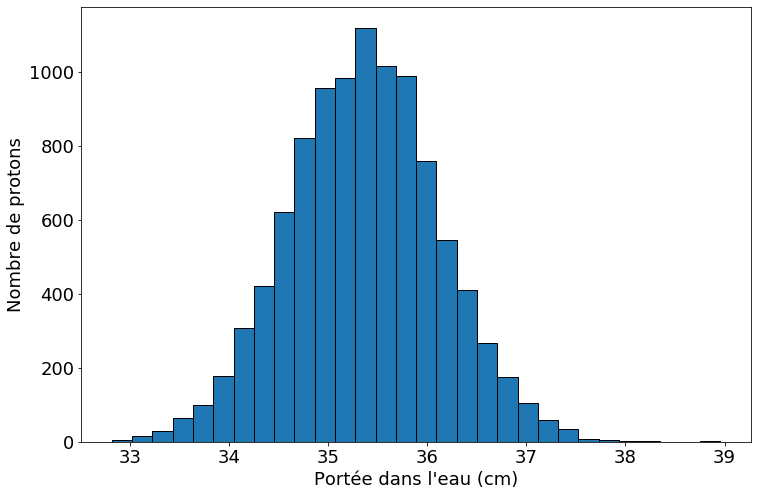

In [12]:
from scipy.integrate import quad

énergies_tests = np.random.normal(240, 3, (n_protons, 1))
portées_eau_scipy = np.empty((n_protons, 1))
inv_Scol_eau = lambda T : 1 / Scol_eau(T)
temps = time.time()
for i in range(n_protons):
    portées_eau_scipy[i] = quad(inv_Scol_eau, start, énergies_tests[i], epsabs = cible)[0]

temps = time.time() - temps

print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, n_protons / temps))

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_scipy, bins=30, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

On peut maintenant comparer la vitesse d'execution des 3 méthodes précédemment utilisées. La méthode de la quadrature gaussienne permet de calculer la portée d'environ 1250 protons par seconde, la méthode des trapèzes permet de calculer la portée d'environ 9,5 protons par secondes et la routine scipy.integrate.quad permet de calculer environ 295 protons par secondes. La méthode la plus rapide est donc celle avec la quadrature gaussienne puisqu'elle utilise beaucoup moins de points que les autres pour être précise. Par contre, scipy.integrate.quad est tout de même très rapide. En effet, cette dernière est codée en Fortran, ce qui est plus rapide que Python car Python est un langage interprété. 

## 12.

# Énergie déposée
## 13.

In [ ]:
def gauss_algo(Scol, Ti, start, Np, Ne):
    [T, w] = p_roots(2 ** Np)
    w = np.array(w)
    F = np.linspace(Ti, start, Ne)
    G = np.empty((Ne, len(Ti)))
    for i in range(1, Ne):
        G[i-1,:] = (np.sum(w / (Scol((np.outer((F[i-1] - F[i]), T) + (F[i-1] + F[i])) / 2)), axis=1) * (F[i-1] - F[i]).T / 2).T
    results = [G, 2 ** N]
    return results


N_points = 256
N_energies = 2000
Ti = np.array([75, 100, 150])

## 14.
